# [AI 이노베이션 스퀘어] 11기 기본 저녁반
- github: https://github.com/hysKim1/AI_Fundamental
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/
---

* [1. 시각:CNN Review](#CNN-Review ) <br>
    *  [ CNN](#CNN)
        *  [Conv2D](#Conv2D)
        *  [MaxPool2D](#MaxPool2D)
        
* [2. 언어:Text Classification ](#Text-Classification)
    *  [unique](#unique)
    *  [join](#join)
    *  [get](#get) 
    *  [sequence 전처리](#sequence-전처리)
        *  [padding](#padding)
            *  [pad_sequences](#pad_sequences)
    *  [Embedding](#Embedding)
    *  [GlobalAveragePooling1D](#GlobalAveragePooling1D)
*  [3.Imbalanced Data ](#Imbalanced-Data)


---

---
# CNN Review

###  CNN
- DNN
    - 비정형 raw data를  2차원에서 1차원으로 변형하여 정형 데이터 학습 하는것처럼 활용
    - 위치, 전처리 성능이 나쁘지 않음
    - 너무 위치에 종속되어 크기가 변하거나 위치가 정중앙 아닌 경우 성능이 나빠짐
    - 일반화 시키기 어려움
    
- CNN
    - 이미지 자체가 아닌 **이미지의 고유 특성**을 뽑아서 특성을 예측모델에 넣음
    - 이미지 바로 넣는게 아닌 특성을 기반으로 변화시킨 이미지로 학습시키니 성능이 좋음
    - 위치, 크기에 상관없이 잘 예측하게 됨

In [1]:
import tensorflow as tf

In [38]:
(X_train,y_train ),(X_test,y_test)=tf.keras.datasets.mnist.load_data()
X_train=X_train.reshape(60000,28,28,1)  #3차원 데이터로 변경
X_train=X_train/255                     #정규화 MinMaxScaler

### CNN layers
#### Conv2D
-     이미지 convoludtion  연산 후 레이어를 계속 넘김에 따라서 특성만 남게됨
-  `tf.keras.layers.Conv2D(filters=32,kernel_size (3,3))`
    - 3 x 3 convolution 32개 kernel 갯수 
    - input:3 차원 데이터 (가로,세로,1)
    
#### MaxPool2D
-  `tf.keras.layers.MaxPool2D(pool_size=())`
-  합성곱 결과를 정사각형의 크기로 대표하는 최대값으로 변경하여 차원 줄임
    - 연산량을 줄임


In [39]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),input_shape=(28,28,1),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),    #특성을 뽑아냄
    
    tf.keras.layers.Flatten(),           #예측 모델
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [40]:
model.summary() #많아 보이지만 큰 차이는 없음

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [41]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [ ]:
model.fit(X_train,y_train, epochs=5,steps_per_epoch=1 )

Epoch 1/5


영상처리 기법
- 이미지 인식: 이미지의 객체 탐지,인식
- 이미지 localization: 해당 객체 찾음
- object detection: 어디에 무엇이 있는지 찾음
- object segmentation: 객체를 형태로 찾음(점)

핵심은 Convolutional Neural Network!

---
 ## 언어

 ### Text Classification
 
 - [IMDB dataset](https://ai.stanford.edu/~amaas/data/sentiment/).
50,000개의 IMDB 영화 사이트에서 영화 리뷰를가져와서 긍정/부정인지 라벨링 되어있음
해당 데이터는 이미 전처리 되어있고 각 리뷰는 숫자로 인덱싱 됨.
데이터에서 전반적인 빈도에 따라 인덱싱 되어있어서 n은 n번째로 가장 많이 언급된 데이터를 의미하여 최빈도 단어를 찾기 좋음 
- 0: 모르는 단어 
- balanced data
    - 각 데이터의 클래스가 균형 잡혀있음(no sampling issue)
tf 공식문서 기본 텍스트 분류 참고 : https://www.tensorflow.org/tutorials/keras/text_classification#정수를_단어로_다시_변환하기

In [ ]:
tf.keras.datasets.imdb.load_data() #shift+ tab 

In [61]:
len(tf.keras.datasets.imdb.load_data()) #2개

2

index_from=3 : 3부터 시작함
- load_data(num_words= )
  - 데이터에서 가장 많이 등장한느 상위 빈도 단어
    
  -  예시에서는 1,000개의 최빈값만 가져옴

In [2]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.imdb.load_data(num_words=1000)

In [25]:
len(X_train), len(X_test)

(25000, 25000)

### unique
- 데이터의 유일한 값과 각 값의 갯수 보여줌

라벨링(이진 분류):
- 0 부정적인 리뷰
- 1 긍정적인 리뷰

In [97]:
import numpy as np

In [102]:
np.unique(y_train,return_counts=True) #근정,부정 갯수 동일

(array([0, 1]), array([12500, 12500]))

- inverse transform 과 비슷
    - 바뀌어진 데이터를 받았기 때문에 원본데이터를 확인하는 작업함

  

### get_word_index
 - 문맥에 따라서 모델 다르게 만들어야함
 - 언어와 숫자(정수) mapping된 dictionary

In [45]:
tf.keras.datasets.imdb.get_word_index()  #단어 리스트 : 단어를 숫자와 매핑됨

1646592/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

- index는 3부터 시작하여 +3 하라고 데이터 설명서에 나와있음 
- index+3 한 것과 mapping 된 단어를 이어 보기 위해서 list comprehension 이용 

In [8]:
for i,j in tf.keras.datasets.imdb.get_word_index().items():
    if j+3 ==14:
        print(i)

this


In [51]:
reverse_dict= dict([(j+3,i) for i,j in tf.keras.datasets.imdb.get_word_index().items()])

첫 번째 리뷰 확인

In [47]:
X_train[0] #단어 갯수가 상이해서 list +3해야 정확한 값 나옴

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 3

In [53]:
reverse_dict[14],reverse_dict[22] # 하나하나 해독하는것을 더 편리하게..

('this', 'film')

In [54]:
[reverse_dict[i] for i in X_train[0] if i >3] #3 이후부터 가져오기 위해서 조건

['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'story',
 'direction',
 'really',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 'father',
 'came',
 'from',
 'the',
 'same',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'with',
 'this',
 'film',
 'the',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'was',
 'amazing',
 'really',
 'at',
 'the',
 'end',
 'it',
 'was',
 'so',
 'sad',
 'and',
 'you',
 'know',
 'what',
 'they',
 'say',
 'if',
 'you',
 'at',
 'a',
 'film',
 'it',
 'must',
 'have',
 'been',
 'good',
 'and',
 'this',
 'def

### join
- list에 저장된 각 단어를 ' '를 이용하여 합침
- 예. 'this','was','awsome' ->'this was awsome'

In [60]:
' '.join([reverse_dict[i] for i in X_train[0] if i >3])

"this film was just brilliant casting story direction really the part they played and you could just imagine being there robert is an amazing actor and now the same being director father came from the same as myself so i loved the fact there was a real with this film the throughout the film were great it was just brilliant so much that i the film as soon as it was released for and would recommend it to everyone to watch and the was amazing really at the end it was so sad and you know what they say if you at a film it must have been good and this definitely was also to the two little that played the of and paul they were just brilliant children are often left out of the i think because the stars that play them all up are such a big for the whole film but these children are amazing and should be for what they have done don't you think the whole story was so because it was true and was life after all that was with us all"

### get
- mapping 되지 않은 단어(주로 저빈도 단어)는 '?' 처리

In [64]:
' '.join([reverse_dict.get(i,'?') for i in X_train[0]])

"? this film was just brilliant casting ? ? story direction ? really ? the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same ? ? as myself so i loved the fact there was a real ? with this film the ? ? throughout the film were great it was just brilliant so much that i ? the film as soon as it was released for ? and would recommend it to everyone to watch and the ? ? was amazing really ? at the end it was so sad and you know what they say if you ? at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and paul they were just brilliant children are often left out of the ? ? i think because the stars that play them all ? up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so ? because it was true and was ? life after all that was ? with us all"

In [26]:
len(X_train[0]),len(X_train[100]) #각 리뷰는 길이가 다름

(218, 158)

### sequence 전처리   

케라스에서 가장 자주 사용하는 전처리를 제공
1. one-hot encoding
    - 1000개의 단어 수 만큼 0,1로 이루어진 column이 늘어 나기 때문에 차원의 저주 문제 생김          
        - 메모리 많이 사용하게 됨.
2. label encoding
    - 단어별로 숫자 부여하여 하나의 벡터로 변환
    - 기기학습은 기본적으로 갯수,shape, dimension 일치해야함
    - 이 방법을 선택하고 0으로 채우는 zero padding 이용해서 보완

### padding
길이가 다 다른 경우 처리 방법
- 기계학습은 모양을 일치 시켰음
- 길이가 다르기 때문에 가장 큰 것을 기준으로 나머지를 zero padding(0 채우기) 이용, 길이를 일치 시켜줌
    - zero-padding: len이용 가장 큰거 찾고 나머지 다 0으로 채워 줄 것이므로
    - 0 사용하는 이유 :계산에 영향을 주지 않아서

In [65]:
tf.keras.preprocessing.sequence #연속된 데이터
tf.keras.preprocessing.image
tf.keras.preprocessing.text.

<function tensorflow.python.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0)>

### pad_sequences
- 데이터 길이가 같아야하는데 리뷰는 각각 길이가 다를때 앞이나 뒤에 0으로 채움
- `pad_sequences(padding='pre',maxlen=None)`
    - padding: 앞/뒤에 0 을 채움
    - maxlen: 전체에서 sequence 가장 긴것에 맞추어 **동일한 길이로 맞추어 0 채움**

In [70]:
tf.keras.preprocessing.sequence.pad_sequences(X_train,padding='pre') #0으로 채움

array([[  0,   0,   0, ...,  19, 178,  32],
       [  0,   0,   0, ...,  16, 145,  95],
       [  0,   0,   0, ...,   7, 129, 113],
       ...,
       [  0,   0,   0, ...,   4,   2,   2],
       [  0,   0,   0, ...,  12,   9,  23],
       [  0,   0,   0, ..., 204, 131,   9]], dtype=int32)

In [69]:
tf.keras.preprocessing.sequence.pad_sequences(X_train,padding='post') #0으로 채움

array([[  1,  14,  22, ...,   0,   0,   0],
       [  1, 194,   2, ...,   0,   0,   0],
       [  1,  14,  47, ...,   0,   0,   0],
       ...,
       [  1,  11,   6, ...,   0,   0,   0],
       [  1,   2,   2, ...,   0,   0,   0],
       [  1,  17,   6, ...,   0,   0,   0]], dtype=int32)

In [71]:
tf.keras.preprocessing.sequence.pad_sequences(X_train,padding='post',maxlen=100) #길이 100

array([[  2,  33,   6, ...,  19, 178,  32],
       [163,  11,   2, ...,  16, 145,  95],
       [  2,   4,   2, ...,   7, 129, 113],
       ...,
       [ 11,   6,   2, ...,   4,   2,   2],
       [100,   2,   8, ...,  12,   9,  23],
       [ 78,   2,  17, ..., 204, 131,   9]], dtype=int32)

 - 가장 긴것이 256개이므로 256 단위로 자름
- column 형태는 직사각형태로 하나씩 넣을수 있어서 영상처리에서 배운것과 동일

In [84]:
X_train=tf.keras.preprocessing.sequence.pad_sequences(X_train,padding='post',maxlen=256)

In [86]:
X_train.shape

(25000, 256)

In [85]:
y_train[0] #영화 리뷰에 대한 긍정 1,부정 0

1

### 모델 구성
- 알고 있는 방식으로 구현 해봄 - 성능 좋지 않음

In [82]:
model=tf.keras.models.Sequential([
    #직접 넣을 수 있음 
    tf.keras.layers.Dense(512,activation='relu',input_shape=(256,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid') #이진분류!!
])

In [83]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 513       
Total params: 394,753
Trainable params: 394,753
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [92]:
model.fit(X_train,y_train,epochs=5) #모델 안좋음

Epoch 1/5
782/782 [==============================] - 5s 7ms/step - loss: 4.5242 - acc: 0.5096
Epoch 2/5
782/782 [==============================] - 4s 6ms/step - loss: 0.6861 - acc: 0.5541
Epoch 3/5
782/782 [==============================] - 4s 6ms/step - loss: 0.6633 - acc: 0.5878
Epoch 4/5
782/782 [==============================] - 4s 6ms/step - loss: 0.6432 - acc: 0.6153
Epoch 5/5
782/782 [==============================] - 4s 6ms/step - loss: 0.6274 - acc: 0.6354


binary인데 정확도가 50~63% 사이로 나옴 (찍는것보다는 약간 좋음..)
데이터 상황에 따라 다름
- 성능 올려야함

In [ ]:
from sklearn.dummy import DummyClassifier #사람 처럼 판단- 찍어도 50% 

단순히 숫자로 표현했기 때문에 단어의 특성을 고려하지 않음
성능이 안 좋을 수 밖에 없음 

In [112]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim= 88584,output_dim =16,input_shape=(None,) )
     #이진분류!!
])

In [113]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          1417344   
Total params: 1,417,344
Trainable params: 1,417,344
Non-trainable params: 0
_________________________________________________________________


In [114]:
#아직 학습 되지 않아 기본적인 연산만 함
model.predict(X_train[0]).shape #256개 1개를 16개로 표혀함

(256, 1, 16)

In [115]:
#3문장 - 다른 값으로 특성을 나타내도록 함 ->16차원
model.predict(X_train[0:3]).shape 

(3, 256, 16)

학습을 통해서 아래의 형태로 바꾸어
줌

### Embedding

- Word embedding :  학습을 통해서 관계까지 고려해서  실수 값을 갖는 **dense vector(embedding vector) 로 표현**
    - One-Hot encoding: 고차원의 희소(sparse) 벡터 사용 [ 0 0 0 0 1 ]

- `tf.keras.layers.Embedding(input_dim=sequences,output_dim=embedding)`
    - 첫번째 레이어에만 사용 가능하며 output_dim 크기의 dense vector 로 바꾸어줌
    - input_dim :데이터 갯수 (get_index 통해서)
    - output_dim: 출렷 갯수( 사용자 지정 )
        e.g. `[[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]`

- 최종 차원: `(batch, sequences, embedding)`
    - ( None ,256,16 ) : 16개의 벡터를 GAP가 1차원으로 변화 시켜 주어 desne로 보냄
    - 임베딩에 대한 가중치가 임의로 초기화함. 훈련 중에 역 전파를 통해 점진적으로 조정. 
    - 학습 된 단어 임베딩은 모델이 학습 된 특정 문제에 대해 학습 된 것처럼 단어 간의 유사성을 인코딩 
    
* embedding도 여러가지 방법이 있음

공식문서 word embedding 참고 : https://www.tensorflow.org/tutorials/text/word_embeddings

In [105]:
len(tf.keras.datasets.imdb.get_word_index())

88584

In [43]:
#예시
embedding_layer = tf.keras.layers.Embedding(input_dim=1000, output_dim=5)
result = embedding_layer(tf.constant([1,2,3])) # 정수로 이루어진 벡터 입력 
result.numpy()# (data,output_dim)=(3,5)

array([[ 0.00457709,  0.01241189,  0.01196324, -0.04178789,  0.04641756],
       [ 0.04846558, -0.00492802,  0.04435727,  0.03765681, -0.03743701],
       [-0.04312087,  0.02605498,  0.0055176 ,  0.02594404,  0.04677793]],
      dtype=float32)

256개 들어온다는것은 embedding 공간 자체가 256 개를 데이터로 만들었지만 중간에 256개 이상 벗어나는 경우 특정 데이터가 변환이 안되는 경우가 생겨서  input_shape=(None, )으로 지정해야할 필요 있음

- input_shape=(None, )하면 Flatten은 에러를 냄 - 평균없이 쭉 변환함

In [130]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 256, 16)           1417344   
_________________________________________________________________
flatten_10 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 16)                65552     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 17        
Total params: 1,482,913
Trainable params: 1,482,913
Non-trainable params: 0
_________________________________________________________________


Flatten 외에 방법을 이용해서 갯수를 정하지 않고 1차원으로 바꿔줘야함!

### GlobalAveragePooling1D
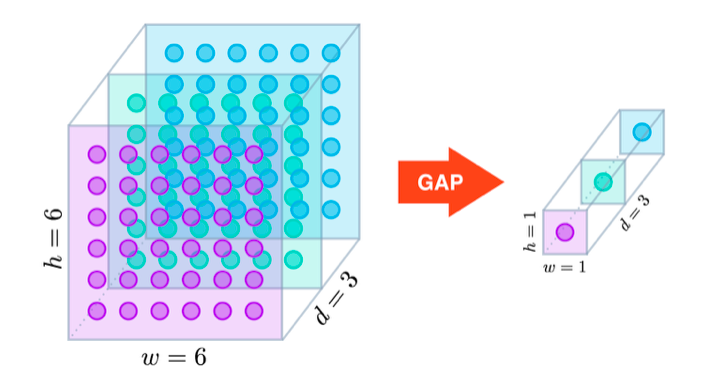
-   `tf.keras.layers.GlobalAveragePooling1`
- h x w x d 의 3차원 텐서를 1 x 1 x d로 축소하면서 Average pooling보다 더 극적으로 차원 축소함
    - 한개씩 다 하는것이 아닌 하나의 데이터 (256,16)만큼을 1개의 평균값으로 바꾸어줌
- sequence 크기에 상관없이  갯수만큼 크기를 일정하게 맞추어 바꾸어줌

Flatten :모양 지정해줘야하지만 GlobalAveragePooling(GAP) 모양 미정도 가능 (None,)

In [139]:
model=tf.keras.models.Sequential([
    #특성 추출 - 같이 나온느 단어 관계 파악하여 16개 벡터로 줄임 
    tf.keras.layers.Embedding(input_dim= 1000,output_dim =16,input_shape=(None,)),
    #위의 특징 1차원화
    tf.keras.layers.GlobalAveragePooling1D(), #1줄 16개
    
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [140]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 16)          16000     
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 17        
Total params: 16,289
Trainable params: 16,289
Non-trainable params: 0
_________________________________________________________________


In [141]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [142]:
model.fit(X_train,y_train, epochs=5)

Epoch 1/5
782/782 [==============================] - 3s 4ms/step - loss: 0.5370 - acc: 0.7506A: 0s - loss: 0.5522 - acc:
Epoch 2/5
782/782 [==============================] - 2s 3ms/step - loss: 0.3508 - acc: 0.8533
Epoch 3/5
782/782 [==============================] - 3s 3ms/step - loss: 0.3250 - acc: 0.8634
Epoch 4/5
782/782 [==============================] - 2s 3ms/step - loss: 0.3151 - acc: 0.8680
Epoch 5/5
782/782 [==============================] - 3s 3ms/step - loss: 0.3110 - acc: 0.8689A: 0s - loss: 0.3111 - acc: 


In [137]:
model=tf.keras.models.Sequential([
    #특성 - 같이 나온느 단어 관계 파악하여 16개 벡터로 줄임 
    tf.keras.layers.Embedding(input_dim= 1000,output_dim =16,input_shape=(None,)),
    #위의 특징 1차원화
    tf.keras.layers.GlobalAveragePooling1D(),
    
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

딥러닝과 머신러닝의 차이: feature extraction 
- ML : 사람이 특정 기법에 의해서 찾음
- DL : 딥러닝은 학습을 통해서 찾음
       
--- 


지금까지은 연습데이터들은 학습을 위해서 거의 균형 데이터에 가까움(거의 동일한 비율로 나눠짐)
### Imbalanced Data
- 불균형 데이터 참고: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data
- 불균형한 경우 적은 해당 클래스는 학습이 잘 안됨

해결방법 

1. 클래스 가중치 적용
    - 예. Positive :Negative = 500:100
        -   Positive :Negative 가중치를 1:5로 줌
    - `model.fit( class_weights )`
2. 오버 샘플링
    - 예. Positive :Negative = 500:100
    - positive 100개만 추출
    - Positive:Negative =100:100 =1:1 로 맞춤

- A: 10000 개중에 9999 개 맞춤 사기를 사기라고 못맞춤
    - accuracy 만 높으나 사기 탐지 실패
- B: 10000 개중에 9998 개 맞춤 사기 탐지하여 찾음
    - B 시스템이 더 알맞음
    - precisoin, recall  같이 사용해서 체크 

데이터 특성에따라서 모델 파라미터 ,평가 하는 항목이 달라지기 때문에 통계 중요 

마지막 시간은 Transfer Learning